In [380]:
library(ggplot2)

In [381]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/thesis/Single cell studies database - Data.csv"
df = read.csv(filename)

In [382]:
# head(df)
colnames(df)

[1] "Shorthand"                                
 [2] "DOI"                                      
 [3] "Authors"                                  
 [4] "Journal"                                  
 [5] "Title"                                    
 [6] "Date"                                     
 [7] "bioRxiv.DOI"                              
 [8] "Reported.cells.total"                     
 [9] "Organism"                                 
[10] "Tissue"                                   
[11] "Technique"                                
[12] "Data.location"                            
[13] "Panel.size"                               
[14] "Measurement"                              
[15] "Cell.source"                              
[16] "Disease"                                  
[17] "Contrasts"                                
[18] "Developmental.stage"                      
[19] "Number.of.reported.cell.types.or.clusters"
[20] "Cell.clustering"                          
[21] "Pseudotime"                               
[22] "RNA.Velocity"                             
[23] "PCA"                                      
[24] "tSNE"                                     
[25] "H5AD.location"                            
[26] "Isolation"                                
[27] "BC.....Cell.ID._OR_.BC.....Cluster.ID"

In [383]:
sel_columns = c("Date","Reported.cells.total","Technique","Shorthand","Measurement")
df_sel = df[df$Measurement == "RNA-seq",sel_columns]
df_sel$Reported.cells.total = gsub(",","",df_sel$Reported.cells.total)
tail(df_sel)

,Date,Reported.cells.total,Technique,Shorthand,Measurement
1079,20200811,,INs-seq,Katzenelenbogen et al Cell,RNA-seq
1080,20200812,,Chromium,Berger et al bioRxiv,RNA-seq
1081,20200813,44089,Chromium,Lau et al DCell,RNA-seq
1083,20200817,28590,Chromium,Koenitzer et al AJRCMB,RNA-seq
1087,20200821,18120,Chromium,Agarwal et al NCommunications,RNA-seq
1088,20200822,,Chromium,Boland et al SImmunology,RNA-seq


In [384]:
df_sel[grep("Hagemann",df_sel$Shorthand),]
df_sel[grep("Zheng",df_sel$Shorthand),]

,Date,Reported.cells.total,Technique,Shorthand,Measurement
1040,20200504,3129,Smart-seq3,Hagemann-Jensen et al NBT,RNA-seq


,Date,Reported.cells.total,Technique,Shorthand,Measurement
179,20170116,250000,GemCode,Zheng et al NComm,RNA-seq
219,20170615,5063,Tang & Smart-seq2,Zheng et al Cell,RNA-seq
266,20180110,3965,GemCode & SMARTer,Zheng et al Hepatology,RNA-seq


In [385]:
# mixed_techniques = unique(as.character(df_sel$Technique))[grep("&",unique(as.character(df_sel$Technique)))]
# df_sel = df_sel[!(df_sel$Technique %in% mixed_techniques),]

In [386]:
# unique(as.character(df_sel$Technique))[grep("Seq",unique(as.character(df_sel$Technique)))]

In [387]:
# sel_techniques = unique(as.character(df_sel$Technique))[grep("seq",unique(as.character(df_sel$Technique)))]
# sel_techniques = c(sel_techniques, unique(as.character(df_sel$Technique))[grep("Seq",unique(as.character(df_sel$Technique)))])
# sel_techniques = c(sel_techniques, 'Tang','Chromium')
# length(sel_techniques)
# df_sel = df_sel[df_sel$Technique %in% sel_techniques,]

In [388]:
df_sel$Reported.cells.total = as.numeric(as.character(df_sel$Reported.cells.total))
df_sel = df_sel[!(is.na(df_sel$Reported.cells.total)),]
df_sel$Date = as.Date(as.character(df_sel$Date), "%Y%m%d")

In [389]:
tail(df_sel[order(df_sel$Reported.cells.total),])

,Date,Reported.cells.total,Technique,Shorthand,Measurement
370,2018-08-09,690000,Drop-seq,Saunders et al Cell,RNA-seq
984,2020-03-25,720000,Microwell-seq,Han et al Nature,RNA-seq
1049,2020-05-23,1027401,Chromium,Jerber et al bioRxiv,RNA-seq
504,2019-02-20,2058652,sci-RNA-seq3,Cao et al Nature,RNA-seq
728,2019-09-09,2250428,HDST,Vickovic et al NMethods,RNA-seq
536,2019-03-28,2522640,Slide-seq,Rodriques et al Science,RNA-seq


In [390]:
# hist(df_sel$Reported.cells.total)

In [391]:
df_sel = df_sel[order(df_sel$Date),]
# df_sel = df_sel[!(is.na(df_sel$Reported.cells.total)),]
df_sel[df_sel$Technique == "Smart-seq3",]
df_sel2 = df_sel[!(duplicated(df_sel$Technique)),]
df_sel2[df_sel2$Technique == "Smart-seq3",]

,Date,Reported.cells.total,Technique,Shorthand,Measurement
1040,2020-05-04,3129,Smart-seq3,Hagemann-Jensen et al NBT,RNA-seq


,Date,Reported.cells.total,Technique,Shorthand,Measurement
1040,2020-05-04,3129,Smart-seq3,Hagemann-Jensen et al NBT,RNA-seq


In [392]:
# ?scale_x_date

In [393]:
df_sel2$Technique

[1] Tang                                                                                                             
  [2] STRT-seq                                                                                                         
  [3] SMART-seq                                                                                                        
  [4] Brouilette                                                                                                       
  [5] CEL-seq                                                                                                          
  [6] Quartz-seq                                                                                                       
  [7] SMARTer                                                                                                          
  [8] SMARTer (C1)                                                                                                     
  [9] Smart-seq2                                                                                                       
 [10] Tang (nuclei)                                                                                                    
 [11] STRT-seq (C1)                                                                                                    
 [12] MARS-seq                                                                                                         
 [13] SCRB-seq                                                                                                         
 [14] DR-Seq                                                                                                           
 [15] CytoSeq                                                                                                          
 [16] SC3-seq                                                                                                          
 [17] Drop-seq                                                                                                         
 [18] InDrops                                                                                                          
 [19] Hi-SCL                                                                                                           
 [20] BAT-Seq                                                                                                          
 [21] aRNA amplification                                                                                               
 [22] Bose                                                                                                             
 [23] Rothwell                                                                                                         
 [24] SUPeR-seq                                                                                                        
 [25] MIRALCS                                                                                                          
 [26] PCR                                                                                                              
 [27] Patch-seq                                                                                                        
 [28] scM&T-seq                                                                                                        
 [29] scTrio-seq                                                                                                       
 [30] Div-seq & sNuc-seq                                                                                               
 [31] SMARTer                                                                                                          
 [32] SCRB-seq (microwell)                                                                                             
 [33] SORT-seq                                                                                                         
 [34] MASC-seq                            

In [394]:
useful_techniques = c("Tang","SMART-seq","Smart-seq2","Smart-seq3","MARS-seq","CITE-seq","STRT-seq", 
                      "CEL-seq","Slide-seq","Microwell-seq","sci-RNA-seq","InDrops","Drop-seq","SNARE-seq")
representative_studies = as.character(df_sel2[df_sel2$Technique %in% useful_techniques,]$Shorthand)
representative_studies = c(representative_studies, "Zheng et al NComm")
df_sel[df_sel$Shorthand %in% representative_studies,]

,Date,Reported.cells.total,Technique,Shorthand,Measurement
10,2009-04-06,5,Tang,Tang et al NMeth,RNA-seq
14,2011-05-05,85,STRT-seq,Islam et al GR,RNA-seq
16,2012-07-22,12,SMART-seq,Ramsköld et al NBT,RNA-seq
18,2012-08-30,96,CEL-seq,Hashimshony et al CR,RNA-seq
27,2013-09-22,68,Smart-seq2,Picelli et al NMeth,RNA-seq
33,2014-02-14,4468,MARS-seq,Jaitin et al Science,RNA-seq
61,2015-05-21,44808,Drop-seq,Macosko et al Cell,RNA-seq
62,2015-05-21,9000,InDrops,Klein et al Cell,RNA-seq
179,2017-01-16,250000,GemCode,Zheng et al NComm,RNA-seq
226,2017-08-17,42000,sci-RNA-seq,Cao et al Science,RNA-seq


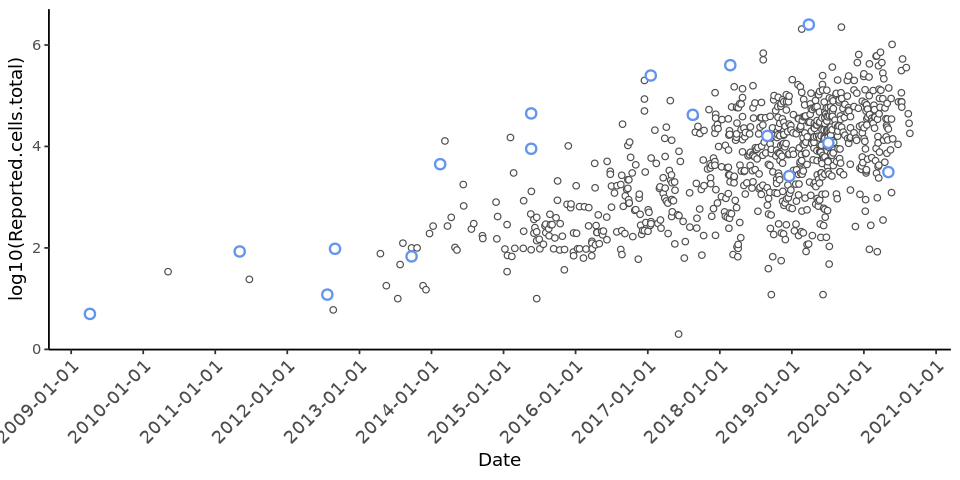

In [395]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(df_sel, aes(x = Date, y = log10(Reported.cells.total))) + 
    geom_point(
        shape = 21, fill = "white", size = 1.5, 
               col = "gray30") +
    geom_point(aes(x = Date, y = log10(Reported.cells.total)), 
               size = 2.2, shape = 21, fill = "white", col = "cornflowerblue", stroke = 1,
               data = df_sel[df_sel$Shorthand %in% representative_studies,]) +
    scale_x_date(date_breaks="1 year") +
#     theme_bw() +
    theme_classic() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 45, hjust = 1, size = 11)) 

In [322]:
tail(df_sel2[order(df_sel2$Reported.cells.total),])
# head(df_sel2[order(df_sel2$Date),])

,Date,Reported.cells.total,Technique,Shorthand,Measurement
962,2020-03-15,389037,Slide-seqV2,Stickels et al bioRxiv,RNA-seq
287,2018-02-23,400000,Microwell-seq,Han et al Cell,RNA-seq
781,2019-12-06,650000,sci-Plex,Srivatsan et al Science,RNA-seq
504,2019-02-20,2058652,sci-RNA-seq3,Cao et al Nature,RNA-seq
728,2019-09-09,2250428,HDST,Vickovic et al NMethods,RNA-seq
536,2019-03-28,2522640,Slide-seq,Rodriques et al Science,RNA-seq
